In [1]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

**Median Salary of Top Jobs And Top Countries**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain')])

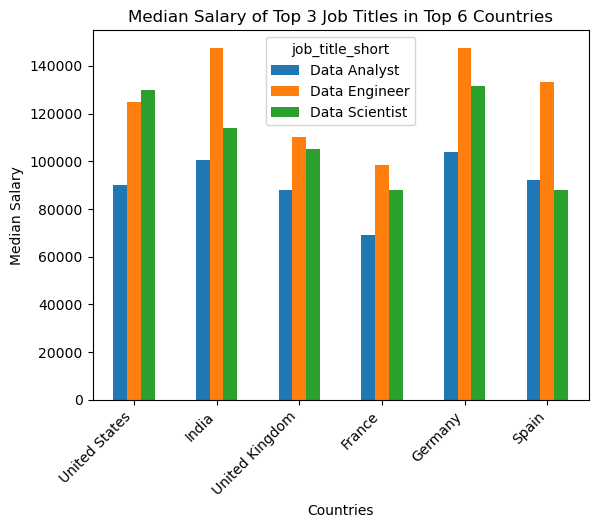

In [7]:
new_table=df.copy()
new_table=new_table.pivot_table(index='job_country',columns='job_title_short',values='salary_year_avg',aggfunc='median')
new_table
top_country=df['job_country'].value_counts().head(6).index
top_jobs=df['job_title_short'].value_counts().head(3).index
new_table=new_table.loc[top_country,top_jobs]
new_table.plot(kind='bar')
plt.title('Median Salary of Top 3 Job Titles in Top 6 Countries')
plt.xlabel('Countries')
plt.ylabel('Median Salary')
plt.xticks(rotation=45,ha='right')